# Projeto - Relatório de fechamanto de mercado por e-mail.

1. importar modulos e bibliotecas
2. pegar dados do ibov e dolar do yahoo finance
3. manipular e formatar dados 
4. calcular retorno diario, mensal e anual
5. localizar na tab de retorno, valores de fechamento de mercado que irão p anexo no email
6. plotar gráficos dos ativos
7. enviar email

In [213]:
import pandas as pd
import datetime
import yfinance as yf
from matplotlib import pyplot as plt
import mplcyberpunk
import win32com.client as win32

In [214]:
codigos = ["^BVSP","BRL=X","WEGE3.SA"]

hoje = datetime.datetime.now()
anoPassado = hoje - datetime.timedelta(days = 365)

dados = yf.download(codigos, anoPassado, hoje)

display(dados)

[*********************100%***********************]  3 of 3 completed


Adj Close                               Close             \
               BRL=X   WEGE3.SA          ^BVSP     BRL=X   WEGE3.SA   
Date                                                                  
2022-02-08  5.262600  29.690409  112234.000000  5.262600  30.219999   
2022-02-09  5.258400  29.759184  112461.000000  5.258400  30.290001   
2022-02-10  5.234500  29.218821  113359.000000  5.234500  29.740000   
2022-02-11  5.248700  29.012501  113572.000000  5.248700  29.530001   
2022-02-14  5.249956  29.906553  113807.000000  5.249956  30.440001   
...              ...        ...            ...       ...        ...   
2023-02-02  5.053500  38.040001  109935.000000  5.053500  38.040001   
2023-02-03  5.049200  37.910000  108490.000000  5.049200  37.910000   
2023-02-06  5.149800  37.570000  108456.000000  5.149800  37.570000   
2023-02-07  5.145700  37.669998  107920.000000  5.145700  37.669998   
2023-02-08       NaN  37.720001  109196.132812       NaN  37.720001   

                             High                                Low  \
                    ^BVSP   BRL=X   WEGE3.SA         ^BVSP     BRL=X   
Date                                                                   
2022-02-08  112234.000000  5.2849  30.940001  112251.00000  5.251000   
2022-02-09  112461.000000  5.2880  30.969999  113163.00000  5.232774   
2022-02-10  113359.000000  5.2446  30.549999  113812.00000  5.170000   
2022-02-11  113572.000000  5.2512  30.010000  114899.00000  5.182800   
2022-02-14  113807.000000  5.2633  30.940001  114167.00000  5.195300   
...                   ...     ...        ...           ...       ...   
2023-02-02  109935.000000  5.0545  38.980000  112943.00000  4.941700   
2023-02-03  108490.000000  5.1347  38.599998  110570.00000  5.046758   
2023-02-06  108456.000000  5.2060  38.029999  108710.00000  5.147992   
2023-02-07  107920.000000  5.2057  37.889999  109037.00000  5.133384   
2023-02-08  109196.132812     NaN  38.320000  109281.53125       NaN   

                                          Open                            \
             WEGE3.SA          ^BVSP     BRL=X   WEGE3.SA          ^BVSP   
Date                                                                       
2022-02-08  30.049999  110943.000000  5.262800  30.770000  111995.000000   
2022-02-09  30.270000  111710.000000  5.256489  30.540001  112233.000000   
2022-02-10  29.620001  112163.000000  5.231429  30.290001  112462.000000   
2022-02-11  29.459999  113128.000000  5.248600  29.799999  113368.000000   
2022-02-14  29.500000  113358.000000  5.250500  29.500000  113643.000000   
...               ...            ...       ...        ...            ...   
2023-02-02  37.709999  109747.000000  5.053500  38.130001  112072.000000   
2023-02-03  37.709999  108185.000000  5.049200  37.840000  110141.000000   
2023-02-06  37.220001  107416.000000  5.149800  37.840000  108518.000000   
2023-02-07  37.230000  107234.000000  5.145700  37.500000  108727.000000   
2023-02-08  37.520000  107830.390625       NaN  37.650002  107832.109375   

           Volume                          
            BRL=X    WEGE3.SA       ^BVSP  
Date                                       
2022-02-08    0.0   6430500.0  10157500.0  
2022-02-09    0.0   5009700.0  13794500.0  
2022-02-10    0.0   8569200.0  13267900.0  
2022-02-11    0.0   9352700.0  18602800.0  
2022-02-14    0.0  10962400.0  10757600.0  
...           ...         ...         ...  
2023-02-02    0.0   7112600.0  15241800.0  
2023-02-03    0.0   8093400.0  13235300.0  
2023-02-06    0.0   6881500.0  11514600.0  
2023-02-07    0.0   8673800.0  12956300.0  
2023-02-08    NaN   1404000.0         0.0  

[262 rows x 18 columns]

In [215]:
fechamento = dados['Adj Close']

#colums nomeia a coluna
fechamento.columns = ['dolar', 'ibov', 'weg3']

fechamento = fechamento.dropna() #exclui dados faltantes

fechamento.head(20)

,dolar,ibov,weg3
Date,,,
2022-02-08,5.262600,29.690409,112234.0
2022-02-09,5.258400,29.759184,112461.0
2022-02-10,5.234500,29.218821,113359.0
2022-02-11,5.248700,29.012501,113572.0
2022-02-14,5.249956,29.906553,113807.0
2022-02-15,5.214000,32.303795,114660.0
2022-02-16,5.157900,30.751482,115181.0
2022-02-17,5.135800,30.112871,113528.0
2022-02-18,5.170600,29.287596,112768.0


In [216]:
# trabalhando com timeframes (linha do tempo)
# resample = redimencionamento, last = fechamento (ultimo)

anual = fechamento.resample("Y").last()   #year
mensal = fechamento.resample("M").last()   #month
diario = fechamento.resample("D").last()   #month

anual

,dolar,ibov,weg3
Date,,,
2022-12-31,5.2668,38.509998,110031.0
2023-12-31,5.1457,37.669998,107920.0


In [217]:
retornoAnual = anual.pct_change().dropna() 
# percent change = variação percentual entre os elementos , % de lucro ou preju
retornoMensal = mensal.pct_change().dropna() 
retornoDiario = diario.pct_change().dropna() 

retornoDiario

,dolar,ibov,weg3
Date,,,
2022-02-09,-0.000798,0.002316,0.002023
2022-02-10,-0.004545,-0.018158,0.007985
2022-02-11,0.002713,-0.007061,0.001879
2022-02-12,0.000000,0.000000,0.000000
2022-02-13,0.000000,0.000000,0.000000
...,...,...,...
2023-02-03,-0.000851,-0.003417,-0.013144
2023-02-04,0.000000,0.000000,0.000000
2023-02-05,0.000000,0.000000,0.000000


In [218]:
#para localizar o fechamento que voce quer utiliza-se loc ou iloc

#loc referencia apartir do nome
diaEspecifico = retornoDiario.loc['2022-04-25', 'dolar']

#iloc referencia a partir de matriz (linha, coluna)
diaEspecificoILOC = retornoDiario.iloc [1, 1]

print(diaEspecificoILOC)

-0.018157867295015118


In [219]:
# menos -1 é igual a ultima linha do dolar, apos o zero o indice volta


retornoDiarioDolar = retornoDiario.iloc[-1,0]
retornoDiarioIbov = retornoDiario.iloc[-1,1]

retornoMensalDolar = retornoMensal.iloc[-1,0]
retornoMensalIbov = retornoMensal.iloc[-1,1]

retornoAnualDolar = retornoAnual.iloc[-1,0]
retornoAnualIbov = retornoAnual.iloc[-1,1]



retornoAnualDolar


-0.022993079396810168

In [220]:
# round arredonda ((multiplica por cem), 2 casas decimais)

retornoDiarioDolar = round((retornoDiarioDolar*100), 2)
retornoDiarioIbov = round((retornoDiarioIbov*100), 2)

retornoMensalDolar = round((retornoMensalDolar*100), 2)
retornoMensalIbov = round((retornoMensalIbov*100), 2)

retornoAnualDolar = round((retornoAnualDolar*100), 2)
retornoAnualIbov = round((retornoAnualIbov*100), 2)


retornoAnualIbov

-2.18

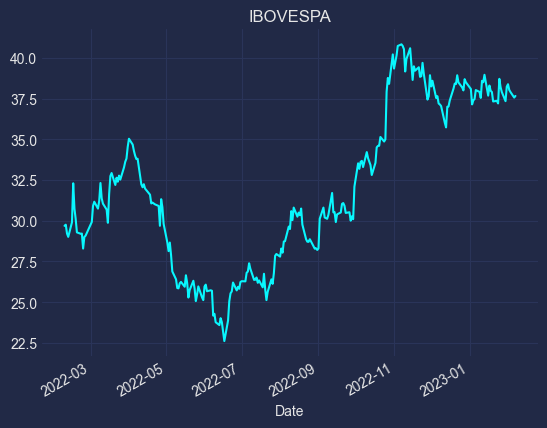

In [221]:
#plt = plotar -  vamo arrumar o gráfico

plt.style.use("cyberpunk")

#linha Y como sendo ibovespa, e indice como base de gráfico, sem legenda
fechamento.plot(y = "ibov", use_index = True, legend = False) 

plt.title("IBOVESPA")

#dpi é depuração de 300px
plt.savefig('fechamentos/ibov.png', dpi=300)

plt.show()

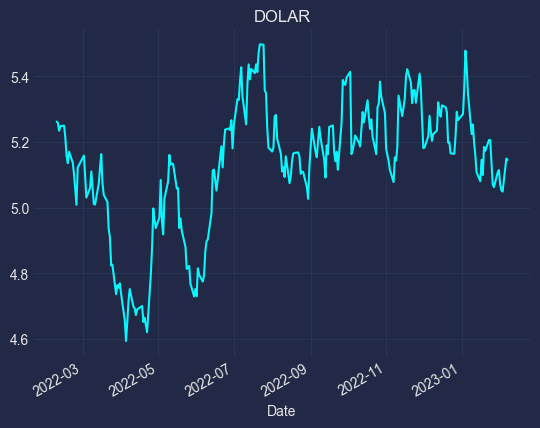

In [222]:
#plt = plotar -  vamo arrumar o gráfico

plt.style.use("cyberpunk")

#linha Y como sendo ibovespa, e indice como base de gráfico, sem legenda
fechamento.plot(y = "dolar", use_index = True, legend = False) 

plt.title("DOLAR")

#dpi é depuração de 300px
plt.savefig('fechamentos/dolar.png', dpi=300)

plt.show()

In [223]:
#chama direto p outolook do pc, logo ja está logado no email!

outlook = win32.Dispatch("outlook.application")

email = outlook.CreateItem(0)

In [231]:

email.To = "pulppor@gmail.com"
email.Subject = "Relatório Diário"
email.Body = f'''Prezado diretor, segue relatórios diários:

Bolsa:

no ano o ibovespa está tendo rentabilidade de {retornoAnualIbov}%,
no mês a rentabilidade é de {retornoMensalIbov}%, 
no último dia útil, o fechamento foi de {retornoDiarioIbov}%.

Dolar:

no ano o dolar está tendo rentabilidade de {retornoAnualDolar}%,
no mês a rentabilidade é de {retornoMensalDolar}%,
no último dia útil, o fechamento foi de {retornoDiarioDolar}%.

Att, Leonardo Pulpor. '''


anexoIbov = r"C:\Users\pulpp\OneDrive\Documentos\GitHub\dataScience\fechamentoMercado\fechamentos\ibov.png"
anexoDolar = r"C:\Users\pulpp\OneDrive\Documentos\GitHub\dataScience\fechamentoMercado\fechamentos\dolar.png"


email.Attachments.add(anexoIbov)
email.Attachments.add(anexoDolar)

email.Send()


com_error: (-2147352567, 'Exceção.', (4096, 'Microsoft Outlook', 'Não é possível adicionar o anexo; nenhuma fonte de dados foi fornecida.', None, 0, -2147352567), None)

In [230]:
display(anexoIbov)

'./ibov.png'

In [ ]:
print(f'''Prezado diretor, segue relatórios diários:

Bolsa:

no ano o ibovespa está tendo rentabilidade de {retornoAnualIbov}%,
no mês a rentabilidade é de {retornoMensalIbov}%, 
no último dia útil, o fechamento foi de {retornoDiarioIbov}%.

Dolar:

no ano o dolar está tendo rentabilidade de {retornoAnualDolar}%,
no mês a rentabilidade é de {retornoMensalDolar}%,
no último dia útil, o fechamento foi de {retornoDiarioDolar}%.

Att, Leonardo Pulpor. ''')

Prezado diretor, segue relatórios diários:

Bolsa:

no ano o ibovespa está tendo rentabilidade de -2.18%,
no mês a rentabilidade é de -1.49%, 
no último dia útil, o fechamento foi de 0.27%.

Dolar:

no ano o dolar está tendo rentabilidade de -2.3%,
no mês a rentabilidade é de 0.6%,
no último dia útil, o fechamento foi de -0.08%.

Att, Leonardo Pulpor. 
